In [147]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad
from scipy.optimize import curve_fit

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [150]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.0
n_e = 1.




#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 10. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_e_nt = 1.
#p_PL = 2.2
p_PL = 3.
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001
kappa = 5
gamma_cutoff = 100.
gamma_transition = 10.

In [181]:
nu_1_2 = (3./2.) * gamma_transition**2 * nu_c * np.sin(theta)
nu_2_3 = (3./2.) * gamma_cutoff**2 * nu_c * np.sin(theta)

def delat_function(epsilon, x):
    prefactor = 1./(epsilon * np.sqrt(np.pi))
    body = np.exp(- (x**2) / (epsilon**2))
    delta = prefactor * body
    return delta

def jnu_kappa_fitting_low_freg(nu):
    
    prefactor = (2.**(4./3.) * np.pi / 3.) * (n_e * e**2 * nu_s / (c * theta_e**2)) * np.exp(1)
    body = (nu/nu_s)**(1./3.) * (1. + 1./kappa)**(- kappa - 1.)
    tail = np.exp(- nu/nu_1_2)
    kappa_low_f = prefactor * body * tail
    return kappa_low_f

def jnu_kappa_fitting_middle_freg(nu):
    first_part       = n_e_nt * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (nu/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
#    tail = np.exp(nu/nu_1_2) * np.exp(- nu/nu_2_3)
    tail= ((nu - nu_1_2)/(1000.)) * np.exp(- nu/nu_2_3) 
    kappa_middle_f   = first_part * second_part * third_part * fourth_part * tail
    return kappa_middle_f

def jnu_kappa_fitting_high_freg(nu):
    prefactor = n_e * np.sqrt(2.) * np.pi * e**2 * nu_s / (6. * theta_e**2 * c)
    body = (nu/nu_c) * (1. + (nu/nu_c)**(1./3.) * (1./kappa))**(- 1.- kappa)
    tail = np.exp(- nu/nu_2_3)
    kappa_high_f = prefactor * body * tail
    return kappa_high_f

def kappa_fitting_formula(nu):
    f = jnu_kappa_fitting_low_freg(nu) + jnu_kappa_fitting_middle_freg(nu) + jnu_kappa_fitting_high_freg(nu)
    return f


#print nu_1_2, nu_2_3, nu_c

In [17]:
print jnu_kappa_fitting_low_freg(nu), jnu_kappa_fitting_middle_freg(nu), jnu_kappa_fitting_high_freg(nu)

2.22396143438e-22 -1.02137893314e-15 1.07218665247e-22


In [10]:
print 10*np.exp(-1), 100*np.exp(-10)

3.67879441171 0.00453999297625


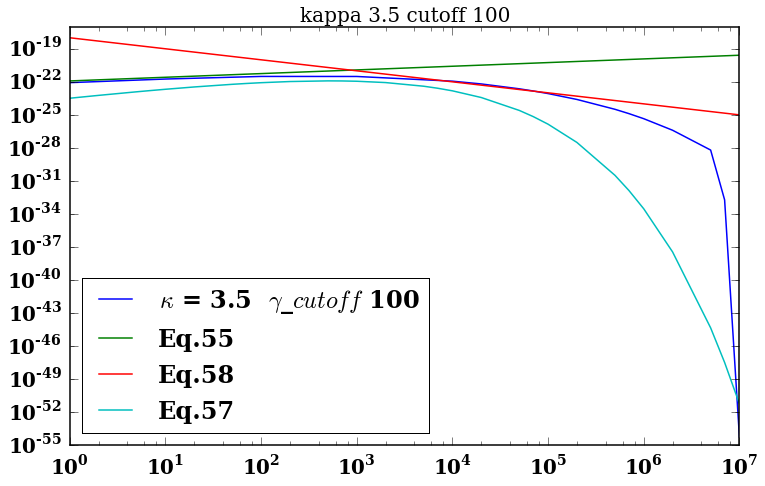

83977516.2674


In [202]:
data4 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_150_with_cutoff100_with_norm.txt')
data5 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_5_with_cutoff100_with_norm.txt')
data6 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_5_with_cutoff1000_with_norm.txt')
data7 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_3_5_with_cutoff1000_with_norm.txt')
data8 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_3_5_with_cutoff100_with_norm.txt')



#pl.loglog(data4[:, 0], data4[:, 1], label = '$\\kappa$ = 150  $\\gamma$_$cutoff$ 100')
#pl.loglog(data7[:, 0], data7[:, 1], label = '$\\kappa$ = 3.5  $\\gamma$_$cutoff$ 1000')
pl.loglog(data8[:, 0], data8[:, 1], label = '$\\kappa$ = 3.5  $\\gamma$_$cutoff$ 100')



#pl.loglog(data5[:, 0], data5[:, 1], label = '$\\kappa$ = 5      $\\gamma$_$cutoff$ 100')
#pl.loglog(data6[:, 0], data6[:, 1], label = '$\\kappa$ = 5      $\\gamma$_$cutoff$ 1000')



def jnu_kappa_fitting_low_freg_no_tail(nu):
#    prefactor = (2.**(4./3.) * np.pi / 3.) * (n_e * e**2 * nu_s / (c * theta_e**2)) * np.exp(1)
#    body = (nu/nu_s)**(1./3.) * (1. + 1./kappa)**(- kappa - 1.)
    prefactor = (2.**(4./3.) * np.pi / 3.) * (n_e * e**2 * nu_s / (c * theta_e**2))
    body = (nu/nu_s)**(1./3.)
#    tail = np.exp(- nu/nu_1_2)
    kappa_low_f = prefactor * body
    return kappa_low_f

def jnu_kappa_fitting_middle_freg_no_tail(nu):
    first_part       = n_e_nt * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (nu/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
#    tail = np.exp(nu/nu_1_2) * np.exp(- nu/nu_2_3)
#    tail= ((nu - nu_1_2)/(1000.)) * np.exp(- nu/nu_2_3) 
    kappa_middle_f   = first_part * second_part * third_part * fourth_part
    return kappa_middle_f

def jnu_kappa_fitting_high_freg_no_tail(nu):
    prefactor = n_e * np.sqrt(2.) * np.pi * e**2 * nu_s / (6. * theta_e**2 * c)
#    body = (nu/nu_s) * (1. + (nu/nu_s)**(1./3.) * (1./kappa))**(- 1.- kappa)
    body = (nu/nu_s) * np.exp(- (nu/nu_s)**(1./3.))
#    tail = np.exp(- nu/nu_2_3)
    kappa_high_f = prefactor * body
    return kappa_high_f

def kappa_fitting_formula(nu):
    f = jnu_kappa_fitting_low_freg(nu) + jnu_kappa_fitting_middle_freg(nu) + jnu_kappa_fitting_high_freg(nu)
    return f



pl.loglog(data7[:,0], jnu_kappa_fitting_low_freg_no_tail(data7[:,0] * nu_c), label = 'Eq.55')
pl.loglog(data7[:,0], 1000*jnu_kappa_fitting_middle_freg_no_tail(data7[:,0] * nu_c), label = 'Eq.58')
pl.loglog(data7[:,0], jnu_kappa_fitting_high_freg_no_tail(data7[:,0] * nu_c), label = 'Eq.57')

pl.title("kappa 3.5 cutoff 100")

#pl.xlim([1, 1e7])

pl.legend(loc='lower left')
pl.show()


print nu_c

data5 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_5_with_cutoff100_with_norm.txt')

data5 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_5_with_cutoff100_with_norm.txt')
pl.loglog(data4[:, 0], data4[:, 1], label = '$\\kappa$ = 150  $\\gamma$_$cutoff$ 100')
pl.loglog(data5[:, 0], data5[:, 1], label = '$\\kappa$ = 5      $\\gamma$_$cutoff$ 100')

def jnu_kappa_fitting_low_freg_no_tail_kappa(nu):
    prefactor = (2.**(4./3.) * np.pi / 3.) * (n_e * e**2 * nu_s / (c * theta_e**2)) * np.exp(1)
    body = (nu/nu_s)**(1./3.) * (1. + 1./kappa)**(- kappa - 1.)
#    prefactor = (2.**(4./3.) * np.pi / 3.) * (n_e * e**2 * nu_s / (c * theta_e**2))
#    body = (nu/nu_s)**(1./3.)
#    tail = np.exp(- nu/nu_1_2)
    kappa_low_f = prefactor * body
    return kappa_low_f

def jnu_kappa_fitting_middle_freg_no_tail(nu):
    first_part       = n_e_nt * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (nu/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
#    tail = np.exp(nu/nu_1_2) * np.exp(- nu/nu_2_3)
#    tail= ((nu - nu_1_2)/(1000.)) * np.exp(- nu/nu_2_3) 
    kappa_middle_f   = first_part * second_part * third_part * fourth_part
    return kappa_middle_f

def jnu_kappa_fitting_high_freg_no_tail_kappa(nu):
    prefactor = n_e * np.sqrt(2.) * np.pi * e**2 * nu_s / (6. * theta_e**2 * c)
    body = (nu/nu_s) * (1. + (nu/nu_s)**(1./3.) * (1./kappa))**(- 1.- kappa)
#    body = (nu/nu_s) * np.exp(- (nu/nu_s)**(1./3.))
#    tail = np.exp(- nu/nu_2_3)
    kappa_high_f = prefactor * body
    return kappa_high_f

def kappa_fitting_formula(nu):
    f = jnu_kappa_fitting_low_freg_kappa(nu) + jnu_kappa_fitting_middle_freg(nu) + jnu_kappa_fitting_high_freg_kappa(nu)
    return f



#pl.xlabel("$\\nu$/$\\nu_c$")

pl.loglog(data4[:,0], jnu_kappa_fitting_low_freg_no_tail_kappa(data4[:,0] * nu_c), label = 'Eq.55')
pl.loglog(data4[:,0], jnu_kappa_fitting_middle_freg_no_tail(data4[:,0] * nu_c), label = 'Eq.58')
pl.loglog(data4[:,0], jnu_kappa_fitting_high_freg_no_tail_kappa(data4[:,0] * nu_c), label = 'Eq.57')
pl.legend(loc='lower left')
pl.show()





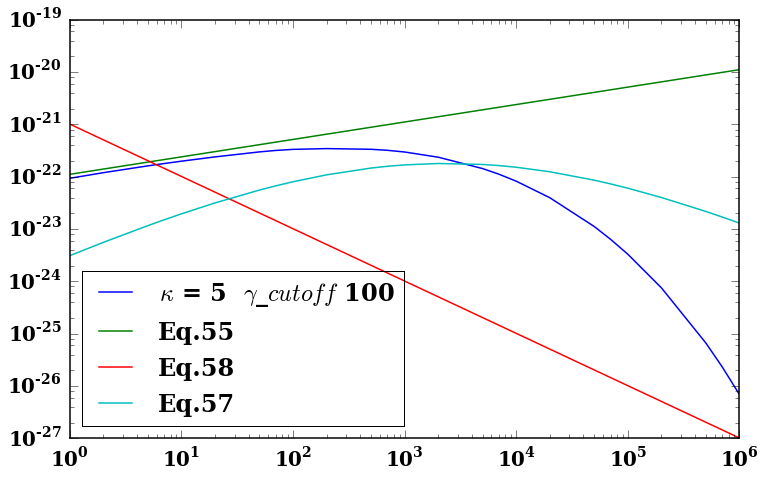

In [82]:
pl.loglog(data5[:, 0], data5[:, 1], label = '$\\kappa$ = 5  $\\gamma$_$cutoff$ 100')

pl.loglog(data5[:,0], jnu_kappa_fitting_low_freg_no_tail_kappa(data5[:,0] * nu_c), label = 'Eq.55')
pl.loglog(data5[:,0], jnu_kappa_fitting_middle_freg_no_tail(data5[:,0] * nu_c), label = 'Eq.58')
pl.loglog(data5[:,0], jnu_kappa_fitting_high_freg_no_tail_kappa(data5[:,0] * nu_c), label = 'Eq.57')
pl.legend(loc='lower left')
pl.show()




In [119]:
data5 = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data_1/kappa_5_with_cutoff100_with_norm.txt')
data5 = np.loadtxt('/Users/zhaoweizhang/Documents/summernew/my_data_1/kappa_5_with_cutoff100_with_norm.txt') 
pl.loglog(data4[:, 0], data4[:, 1], label = 'kappa = 150 gammacutoff 100') 
pl.loglog(data5[:, 0], data5[:, 1], label = 'kappa = 5 gamma_cutoff 100')

def jnu_kappa_fitting_low_freg_no_tail_kappa(nu): 
    prefactor = (2.(4./3.) np.pi / 3.) (n_e * e2 nu_s / (c theta_e2)) * np.exp(1) 
    body = (nu/nu_s)(1./3.) (1. + 1./kappa)*(- kappa - 1.)
    prefactor = (2.(4./3.) np.pi / 3.) (n_e * e2 nu_s / (c theta_e**2))
    body = (nu/nu_s)**(1./3.)
    tail = np.exp(- nu/nu_1_2)
    kappa_low_f = prefactor * body
    return kappa_low_f
def jnu_kappa_fitting_middle_freg_no_tail(nu): 
    first_part = n_e_nt (e**2 nu_c /c) 
    second_part_nume = 3.(p_PL/2.) (p_PL - 1.) np.sin(theta) 
    second_part_demo = 2. (p_PL + 1.) (gamma_50_min(1. - p_PL) - gamma_50_max(1. - p_PL)) 
    second_part = second_part_nume/second_part_demo 
    third_part = special.gamma((3. p_PL - 1.)/ 12.) special.gamma((3. p_PL + 19.)/12.) 
    fourth_part = (nu/(nu_c np.sin(theta)))(- (p_PL - 1.)/2.)
    tail = np.exp(nu/nu_1_2) * np.exp(- nu/nu_2_3)
    tail= ((nu - nu_1_2)/(1000.)) * np.exp(- nu/nu_2_3)
    kappa_middle_f   = first_part * second_part * third_part * fourth_part
    return kappa_middle_f
def jnu_kappa_fitting_high_freg_no_tail_kappa(nu): 
    prefactor = n_e np.sqrt(2.) np.pi e**2 nu_s / (6. theta_e**2 c) 
    body = (nu/nu_s) (1. + (nu/nu_s)**(1./3.) (1./kappa))**(- 1.- kappa)
    body = (nu/nu_s) np.exp(- (nu/nu_s)*(1./3.))
    tail = np.exp(- nu/nu_2_3)
    kappa_high_f = prefactor * body
    return kappa_high_f
def kappa_fitting_formula(nu): 
    f = jnu_kappa_fitting_low_freg_kappa(nu) + jnu_kappa_fitting_middle_freg(nu) + jnu_kappa_fitting_high_freg_kappa(nu) 
    return f

pl.xlabel("nu/nuc")
pl.loglog(data4[:,0], jnu_kappa_fitting_low_freg_no_tail_kappa(data4[:,0] nu_c), label = 'Eq.55') 
pl.loglog(data4[:,0], jnu_kappa_fitting_middle_freg_no_tail(data4[:,0] nu_c), label = 'Eq.58') 
pl.loglog(data4[:,0], jnu_kappa_fitting_high_freg_no_tail_kappa(data4[:,0] * nu_c), label = 'Eq.57') 
pl.legend(loc='lower left') 
pl.show()


SyntaxError: invalid syntax (<ipython-input-119-be2a75157dae>, line 7)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in power


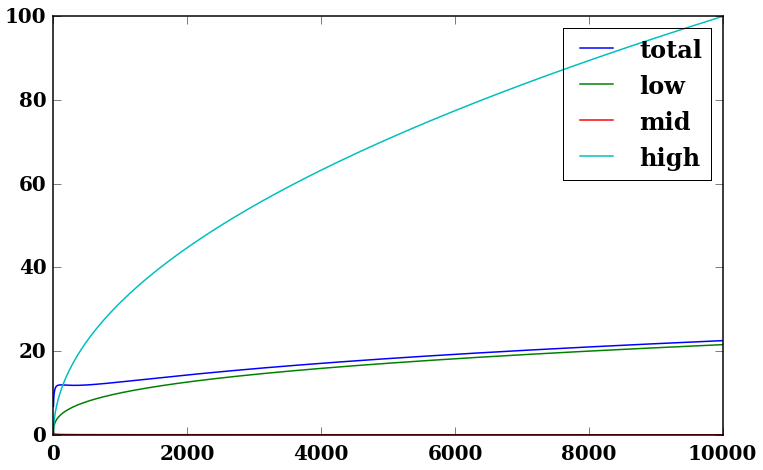

In [139]:
x_here = np.arange(0, 10000, 1)
def fun_plot(x):
    y = (x**(1./6.) + x**(-1./4.) + x**(1./2.) * np.exp(- (1./2.) * x**(1./3.)))**2
    return y

pl.plot(x_here, fun_plot(x_here), label = 'total')
pl.plot(x_here, x_here**(1./3.), label = 'low')
pl.plot(x_here, x_here**(-1./2.), label = 'mid')
pl.plot(x_here, x_here**(1./2.), label = 'high')
pl.legend()
pl.show()



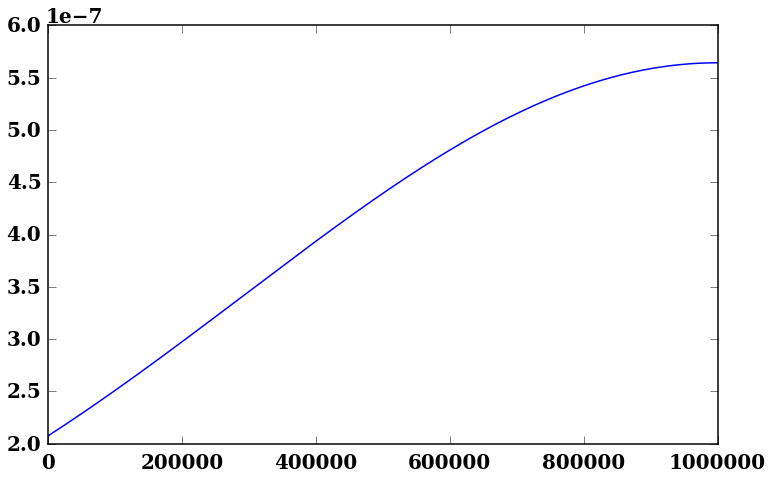

In [178]:
x = np.arange(1, 1000000, 0.1)
pl.plot(x, delat_function(1000000, x - 1000000))

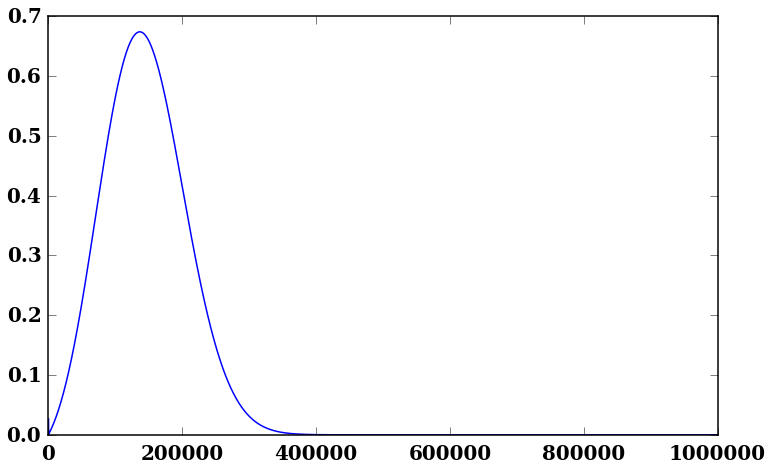

In [195]:
Coef_A = 1
Coef_B = 1
Coef_C = 1

def fitting_kappa(x):
    first_term = Coef_A * x**(1./3.) * delat_function(100, x - 100)
    second_term = Coef_B * x**(- 3./4.) * delat_function(10**3, x - 10**3)
    third_term = Coef_C * x * delat_function(10**5, x - 10**5)
    f = first_term + second_term + third_term
    return f
x_here = np.arange(1, 1e6, 1)

pl.plot(x_here, fitting_kappa(x_here))
#l.plot(x_here, Coef_A * x_here**(1./3.) * delat_function(10, x_here - 10))
